# TP 2 Optimisation Bekdouche Lina Insaf:
groupe ISI A

- Prise en main des packages numpy et matplotlib
- Minimisation d’une fonction d’une variable

## *1.* Recherche du minimum d’une fonction par la méthode de dichtomie :

### Programme de test de la recherche de minimum par dichotomie

In [1]:
# Importation des bibliothèques numpy et pyplot
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
#%% Fonction test n°1
def f1(x) :
    return (x+1)**2 + 7*np.sin(x)
#%% Fonction test n°2
def f2(x) :
    return (x+1)**2 + 10*np.sin(x)

In [3]:
# Creation de la fonction minimumDichotomie 
def minimumDichotomie(f,x_min,x_max,precision):
    n=0
    i="TRUE"
    borne_min= [[x_min],[f(x_min)]]
    borne_max= [[x_max],[f(x_max)]]
    x5=x_max
    x1=x_min

    try : 
        
        while abs(x5-x1) > precision:
            
            x3= (x5+x1)/2
            x2= (x1+x3)/2
            x4= (x3+x5)/2
            
            
            if  f(x1)< f(x2)< f(x3)<f(x4)<f(x5):
                x5=x2
        
            elif f(x1)> f(x2)< f(x3)<f(x4)<f(x5):
                x5=x3
                
            elif f(x1)> f(x2)> f(x3)<f(x4)<f(x5):
                x5=x4
                x1=x2
                
            elif f(x1)> f(x2)> f(x3)>f(x4)<f(x5):
                x1=x3
                
            elif f(x1)> f(x2)> f(x3)>f(x4)>f(x5):
                x1=x4
          
            borne_max=np.append(borne_max,[[x5],[f(x5)]],axis=1)
            borne_min=np.append(borne_min,[[x1],[f(x1)]],axis=1)
        
            
            n+=1
            
    except : 
        i= "FALSE"
    return borne_min,borne_max,n,i

In [4]:
#%% Recherche du minimum de f1 sur l'intervalle [-4,4]
x_min = -4
x_max = +4

precision1 = 1e-1
precision2 = 1e-2

In [5]:
# METHODE minimumDichotomie A CREER
bornes_min, bornes_max, n_iter, i_err = minimumDichotomie(f1,x_min,x_max,precision1)
bornes_min, bornes_max, n_iter, i_err

(array([[-4.        , -4.        , -2.        , -2.        , -1.75      ,
         -1.625     , -1.5       , -1.46875   ],
        [14.29761747, 14.29761747, -5.36508199, -5.36508199, -6.32540163,
         -6.59909438, -6.73246491, -6.74385797]]),
 array([[ 4.        ,  0.        ,  0.        , -1.        , -1.25      ,
         -1.375     , -1.375     , -1.40625   ],
        [19.70238253,  1.        ,  1.        , -5.89029689, -6.58039234,
         -6.7256264 , -6.7256264 , -6.74041033]]),
 7,
 'TRUE')

### Analyser son comportement pour différentes précisions: 

On a realiser une fonction minimumDichotomie qui nous renvoie les liste des bornes inférieures et supérieures des intervalles successifs de la methode de dichotomie ainsi que le nombre d'iteration necessaire pour atteindre une precision precise.

On remarque donc que pour atteindre une precision de 0.1 avec la methode de dichotomie il eut fallu 7 itterations et 10 pour une precision de 0.01

In [8]:
#Definition des bornes pour la fonction 2
x_min2= -2
x_max2= +2
precision1 = 1e-1
precision2 = 1e-2
# METHODE minimumDichotomie A CREER
bornes_min2, bornes_max2, n_iter2, i_err2 = minimumDichotomie(f2,x_min2,x_max2,precision1)
bornes_min2, bornes_max2, n_iter2, i_err2

(array([[-2.        , -2.        , -2.        , -1.75      , -1.625     ,
         -1.5625    , -1.5       ],
        [-8.09297427, -8.09297427, -8.09297427, -9.27735947, -9.59468841,
         -9.68324961, -9.72494987]]),
 array([[ 2.        ,  0.        , -1.        , -1.25      , -1.375     ,
         -1.4375    , -1.4375    ],
        [18.09297427,  1.        , -8.41470985, -9.42734619, -9.66830557,
         -9.71988566, -9.71988566]]),
 6,
 'TRUE')

### Analyser son comportement pour la fonction f2 : 


On a essayer notre programme une deuxieme fois avec la fonction 2 et on remarque que le programme prends longtemps à s'executer. Cela arrive car notre fonction 2 n'est pas unimodale sur l'interval d'ou [-4,+4].

Si on réessaie mais cette fois ci on commence avec l'interval [-2,+2], on obtient bien des resultats.

On en deduit donc que avant de d'executer notre methode de dichotomie on doit d'abord s'assurer que notre fonction est unimodale sur l'interval par ou on commence. 

La fonction 𝑓 est unimodale sur  𝑎, 𝑏 si elle dérivable, et que sa dérivée s’annule et change de 
signe en un point unique de l’intervalle, noté 𝑐.

In [9]:
x_min, y_min = bornes_min[0][-1], bornes_min[1][-1]
x_max, y_max = bornes_max[0][-1], bornes_max[1][-1]

Text(1, -5, 'Precision = 0.1\nCV en 7 iterations\nBorne inférieure :\n  x_min = -1.4688\n  y_min = -6.7439\nBorne supérieure :\n  x_max = -1.4062\n  y_max = -6.7404')

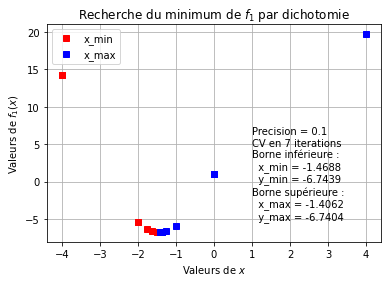

In [12]:
# Visualisation des résultats
plt.plot(bornes_min[0],bornes_min[1],'rs', label = 'x_min')
plt.plot(bornes_max[0],bornes_max[1],'bs', label = 'x_max')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $f_1(x)$')
plt.title('Recherche du minimum de $f_1$ par dichotomie')
plt.grid()

message = 'Precision = {}'.format(precision1)
message += '\nCV en {} iterations'.format(n_iter)
message += '\nBorne inférieure :'
message += '\n  x_min = {:6.4f}'.format(x_min)
message += '\n  y_min = {:6.4f}'.format(y_min)
message += '\nBorne supérieure :'
message += '\n  x_max = {:6.4f}'.format(x_max)
message += '\n  y_max = {:6.4f}'.format(y_max)
plt.text(1,-5,message)


## *2.* Recherche du minimum d’une fonction par la méthode de Newton :

### Programme de test de la recherche de minimum par méthode de Newton

In [13]:
#Definition des derivées de notre fonction

#Definition de la derivée 1

def df1(x):
    return 2*x+2+7*np.cos(x)

#Definition de la derivée 2

def df2(x):
    return 2-7*np.sin(x)

In [14]:
# Creation de la fonction minimumNewton
def minimumNewton(f,df1,df2,x0,precision,nmax):
    xn,xn1=x0,x0+df1(x0)/df2(x0) 
    n=0
    i="TRUE"
    try : 
        while abs(xn1-xn)>=precision and n<nmax :
            xn=xn1
            xn1=xn-df1(xn)/df2(xn) 
            
            n+=1
    except : 
        i= "FALSE"
    return f(xn1),xn1,n,i

In [16]:

x0,x1,x2=0,-1,-1.3
nmax=100000
precision1 = 1e-1
precision2 = 1e-4
minimumNewton(f1,df1,df2,x2,precision2,nmax)

(-6.746669208809859, -1.4436866942189517, 3, 'TRUE')

### Analyser son comportement pour différents points de departs et différentes précisions: 

On a realiser une fonction minimumDNewton qui nous renvoie la solution trouvée, ainsi que le nombre d'iteration necessaire pour atteindre une precision precise.

On remarque donc que pour atteindre une precision de 0.1 avec la methode de Newton :

En démarrant de la postion x0=0 il eut fallu 5 itterations.

En démarrant de la postion x1=-1 il eut fallu 3 itterations.

En démarrant de la postion x2=-1.3 il eut fallu 2 itterations.



On remarque aussi que pour atteindre une precision de 0.0001 avec la methode de Newton :

En démarrant de la postion x0=0 il eut fallu 6 itterations.

En démarrant de la postion x1=-1 il eut fallu 4 itterations.

En démarrant de la postion x2=-1.3 il eut fallu 3 itterations.


On en conclut donc que : 

La methode de Newton est très efficace quand on démmare au voisinage de la solution du coup il faut bien choisir son point de depart



### Analyse comparative de la méthode de dichotomie et de la méthode de Newton

On remarque d'apres nos resultats que la méthode de Newton est puissante et trés rapide, mais elle nécessite d’avoir accès aux dérivées d’ordre 1 et 2 de la fonction à minimiser. Ces dérivées peuvent ne pas être disponibles.
mais aussi que pour que la methode de Newton soit efficace on doit partir d'un point relativement proche de la solution, ou au moins dans une région où la fonction est localement convexe.

Pour la methode de dichotomie elle est beaucoup plus basique et sure, mais moins rapide et necessite que la fonction soit unimodal sur l'interval de debut.

Comme on a vu en cours on peut toujours combiner la recherche par dichotomie pour réduire l’intervalle de recherche de la solution, puis recherché par Newton quand on n’est plus très éloigné de la solution.
